# Contents
### 1. Questions
### 2. Library and Data Upload
### 3. Consistency Checks
* Check for duplicates
* Check for null values

### 4. Exploratory Data Analysis
* Date range of survey data
* Number of participating districts and schools
* Number of trainings by type and method
* Trainee make-up

### 5. Data Profile
### 6. Download Dataframe

## 1. Questions
 * How is the Instruction Partners team performing? 
 * How are the partners feeling about our work? 
 * Across the organization, what are bright spots and our places to improve? Are there any major outliers?
 * What are the significant patterns or trends? How is the data changing over time?

## 2. Library and Data Upload

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create file path
path = r'/Users/caitlin/iCloud/Caitlin/Instruction Partners'

In [3]:
path

'/Users/caitlin/iCloud/Caitlin/Instruction Partners'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, 'Instruction Partners Survey Data - ORIGINAL.csv'))

In [5]:
# Check data
df.shape

(3649, 21)

In [6]:
df.head(3)

,Survey Collection ID,System,School,Survey Type,Delivery Method,Date,Primary Facilitator,Secondary Facilitator,Tertiary Facilitator,Quaternary Facilitator,...,Clear about change we seek,Clear about roles and responsibilities,Confident plan will achieve goals,Feel more equipped,Equipped and supported,Understand state of instruction,Valuable use of my time:,Clarity direction of work ahead,I learned something:,Likely to recommend Instruction Partners
0,a152E00000EpDCyQAN,District/Network 32,School 69,Leader Coaching,Virtual,7/13/21,Facilitator 10,Facilitator 33,Facilitator 13,Facilitator 16,...,NaN,NaN,NaN,NaN,NaN,NaN,Strongly Agree,NaN,Strongly Agree,NaN
1,a152E00000EpDCyQAN,District/Network 32,School 69,Leader Coaching,Virtual,7/13/21,Facilitator 10,Facilitator 33,Facilitator 13,Facilitator 16,...,NaN,NaN,NaN,NaN,NaN,NaN,Strongly Agree,NaN,Strongly Agree,NaN
2,a152E00000EpDCyQAN,District/Network 32,School 72,Leader Coaching,Virtual,7/13/21,Facilitator 10,Facilitator 33,Facilitator 13,Facilitator 16,...,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,NaN,Somewhat Disagree,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Survey Collection ID                      3649 non-null   object 
 1   System                                    3649 non-null   object 
 2   School                                    3157 non-null   object 
 3   Survey Type                               3649 non-null   object 
 4   Delivery Method                           3545 non-null   object 
 5   Date                                      3649 non-null   object 
 6   Primary Facilitator                       3649 non-null   object 
 7   Secondary Facilitator                     1732 non-null   object 
 8   Tertiary Facilitator                      943 non-null    object 
 9   Quaternary Facilitator                    328 non-null    object 
 10  Submitter Role                      

## 2. Consistency Checks

#### Check for duplicates

In [8]:
# Find duplicates
df_dups = df[df.duplicated()]

In [9]:
df_dups

,Survey Collection ID,System,School,Survey Type,Delivery Method,Date,Primary Facilitator,Secondary Facilitator,Tertiary Facilitator,Quaternary Facilitator,...,Clear about change we seek,Clear about roles and responsibilities,Confident plan will achieve goals,Feel more equipped,Equipped and supported,Understand state of instruction,Valuable use of my time:,Clarity direction of work ahead,I learned something:,Likely to recommend Instruction Partners
8,a152E00000EpDCyQAN,District/Network 32,School 73,Leader Coaching,Virtual,7/13/21,Facilitator 10,Facilitator 33,Facilitator 13,Facilitator 16,...,NaN,NaN,NaN,NaN,NaN,NaN,Agree,NaN,Strongly Agree,NaN
13,a152E00000EpDD3QAN,District/Network 5,School 5,Leader Coaching,Virtual,7/15/21,Facilitator 10,Facilitator 13,Facilitator 16,Facilitator 67,...,NaN,NaN,NaN,NaN,NaN,NaN,Agree,NaN,Agree,NaN
21,a152E00000EpDD3QAN,District/Network 5,School 11,Leader Coaching,Virtual,7/15/21,Facilitator 10,Facilitator 13,Facilitator 16,Facilitator 67,...,NaN,NaN,NaN,NaN,NaN,NaN,Strongly Agree,NaN,Strongly Agree,NaN
31,a152E00000Eq6lsQAB,District/Network 7,School 108,Professional Development,NaN,7/21/21,Facilitator 6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Strongly Agree,NaN,Strongly Agree,10.0
34,a152E00000Eq6lsQAB,District/Network 7,School 108,Professional Development,NaN,7/21/21,Facilitator 6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Strongly Agree,NaN,Strongly Agree,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,a152E0000050R2SQAU,District/Network 57,School 165,Professional Development,On-site,2/28/22,Facilitator 21,NaN,NaN,NaN,...,NaN,NaN,NaN,Strongly Agree,NaN,NaN,Strongly Agree,NaN,NaN,10.0
3635,a152E0000050R2SQAU,District/Network 57,School 165,Professional Development,On-site,2/28/22,Facilitator 21,NaN,NaN,NaN,...,NaN,NaN,NaN,Strongly Agree,NaN,NaN,Strongly Agree,NaN,NaN,10.0
3638,a152E0000050R2SQAU,District/Network 57,School 165,Professional Development,On-site,2/28/22,Facilitator 21,NaN,NaN,NaN,...,NaN,NaN,NaN,Agree,NaN,NaN,Agree,NaN,NaN,8.0
3639,a152E0000050R2SQAU,District/Network 57,School 165,Professional Development,On-site,2/28/22,Facilitator 21,NaN,NaN,NaN,...,NaN,NaN,NaN,Strongly Agree,NaN,NaN,Strongly Agree,NaN,NaN,10.0


In [10]:
# Drop duplicates 
df_2 = df.drop_duplicates()

In [11]:
# Check drop
df_2.shape

(3141, 21)

#### Check for null values

In [12]:
# Count null values
df_2.isnull().sum()

Survey Collection ID                           0
System                                         0
School                                       416
Survey Type                                    0
Delivery Method                               78
Date                                           0
Primary Facilitator                            0
Secondary Facilitator                       1661
Tertiary Facilitator                        2341
Quaternary Facilitator                      2866
Submitter Role                                 0
Clear about change we seek                  2749
Clear about roles and responsibilities      2749
Confident plan will achieve goals           2749
Feel more equipped                          1177
Equipped and supported                      3133
Understand state of instruction             2615
Valuable use of my time:                       0
Clarity direction of work ahead             3133
I learned something:                        1892
Likely to recommend 

COMMENTS: No nulls deleted
* Nulls in schools make sense because individuals can participate outside their schools.
* There are several nulls in secondary through quatrenary facilitators, but since not all workshops have multiple facilitators, those can stay.
* Not all surveys include customer satisfaction surveys, so those can also stay

## 3. Exploratory Data Analysis

#### Date range of survey data

In [13]:
# Change date column to datetime format so it behaves as a number
df_2['Date'] = pd.to_datetime(df_2['Date'])

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_94407/1934735242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Date'] = pd.to_datetime(df_2['Date'])


In [14]:
# Check change
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Survey Collection ID                      3141 non-null   object        
 1   System                                    3141 non-null   object        
 2   School                                    2725 non-null   object        
 3   Survey Type                               3141 non-null   object        
 4   Delivery Method                           3063 non-null   object        
 5   Date                                      3141 non-null   datetime64[ns]
 6   Primary Facilitator                       3141 non-null   object        
 7   Secondary Facilitator                     1480 non-null   object        
 8   Tertiary Facilitator                      800 non-null    object        
 9   Quaternary Facilitator        

In [15]:
# Check date range
df_2['Date'].min()

Timestamp('2021-07-13 00:00:00')

In [16]:
df_2['Date'].max()

Timestamp('2022-02-28 00:00:00')

#### Number of districts and schools

In [17]:
# Determine number of districts
df_2['System'].value_counts()

District/Network 2     813
District/Network 3     204
District/Network 60    134
District/Network 44    121
District/Network 31     92
                      ... 
District/Network 36      3
District/Network 64      2
District/Network 40      2
District/Network 30      2
District/Network 19      2
Name: System, Length: 73, dtype: int64

In [18]:
# Determine number of schools
df_2['School'].value_counts()

School 37     52
School 91     46
School 63     45
School 24     44
School 61     43
              ..
School 223     1
School 30      1
School 221     1
School 207     1
School 179     1
Name: School, Length: 223, dtype: int64

In [19]:
# Determine number of unique survey IDs
df_2['Survey Collection ID'].value_counts()

a152E00000Df3wdQAB    25
a152E00000FGTnjQAH    23
a152E00000F4eH3QAJ    22
a152E00000DepaBQAR    22
a152E00000Dex5XQAR    21
                      ..
a152E00000FElTaQAL     1
a152E00000FElTpQAL     1
a152E00000FElTfQAL     1
a152E00000F2df4QAB     1
a152E00000FdHHzQAN     1
Name: Survey Collection ID, Length: 837, dtype: int64

In [20]:
df_3 = df_2.groupby('Primary Facilitator')['Date'].nunique()

In [21]:
print(df_3)

Primary Facilitator
Facilitator 1     28
Facilitator 10    11
Facilitator 11    26
Facilitator 12     9
Facilitator 13     9
                  ..
Facilitator 64     4
Facilitator 65     1
Facilitator 7     16
Facilitator 8     34
Facilitator 9     14
Name: Date, Length: 63, dtype: int64


In [22]:
# Download facilitator data to CSV
df_3.to_excel(os.path.join(path, 'Number of Courses by Facilitator.xlsx'))

#### Number of trainings, by type and method

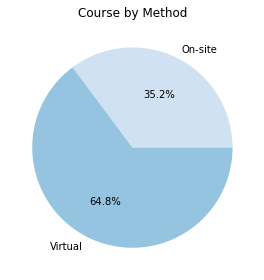

In [23]:
# Create pie chart of training by delivery method
pie_course_makeup = df_2['Delivery Method'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Blues', 4))
plt.title("Course by Method")
plt.ylabel('')
plt.tight_layout()

In [24]:
# Crosstab to determine what types of courses are most common and which delivery method
training_types = pd.crosstab(df_2['Survey Type'], df_2['Delivery Method'],dropna = False)

In [25]:
training_types

Delivery Method,On-site,Virtual
Survey Type,,
Action Planning,59,276
Leader Coaching,131,257
PLC Support,7,56
Professional Development,395,1226
Progress Monitoring,2,63
Teacher Coaching,5,60
Walkthrough and Debrief,479,47


#### Trainee make-up

In [26]:
# Determine make up of trainees, as a percentage of total
df_2['Submitter Role'].value_counts(normalize=True)

Teacher                                    0.214263
Principal                                  0.207577
Assistant Principal                        0.202165
Instructional Coach                        0.186565
District Leader / CMO Leader               0.072270
Other                                      0.063356
Teacher Leader                             0.044890
Superintendent / CMO Executive Director    0.008914
Name: Submitter Role, dtype: float64

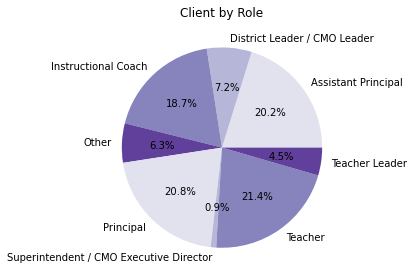

In [27]:
# Create pie chart of clients by role
pie_customer_makeup = df_2['Submitter Role'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Purples', 4))
plt.title("Client by Role")
plt.ylabel('')
plt.tight_layout()

#### Review question by course

In [28]:
# Clear about changes we seek question
changes_clear = df_2.groupby(['Survey Type', 'Clear about change we seek']).size().reset_index(name="Number of Responses")

In [29]:
changes_clear

,Survey Type,Clear about change we seek,Number of Responses
0,Action Planning,Agree,120
1,Action Planning,Neutral,2
2,Action Planning,Somewhat Agree,10
3,Action Planning,Somewhat Disagree,1
4,Action Planning,Strongly Agree,191
5,Action Planning,Strongly Disagree,2
6,Professional Development,Neutral,1
7,Progress Monitoring,Agree,28
8,Progress Monitoring,Somewhat Agree,2
9,Progress Monitoring,Somewhat Disagree,1


In [30]:
# Clear about roles and responsbilities question
responsibility_clear = df_2.groupby(['Clear about roles and responsibilities', 'Survey Type']).size().reset_index(name="Number of Responses")

In [31]:
responsibility_clear

,Clear about roles and responsibilities,Survey Type,Number of Responses
0,Agree,Action Planning,132
1,Agree,Progress Monitoring,28
2,Disagree,Action Planning,3
3,Neutral,Action Planning,5
4,Neutral,Professional Development,1
5,Neutral,Progress Monitoring,4
6,Somewhat Agree,Action Planning,29
7,Somewhat Agree,Progress Monitoring,4
8,Somewhat Disagree,Action Planning,3
9,Strongly Agree,Action Planning,152


In [32]:
# Confident in goals question
confident_goals = df_2.groupby(['Survey Type', 'Confident plan will achieve goals']).size().reset_index(name="Number of Responses")

In [33]:
confident_goals

,Survey Type,Confident plan will achieve goals,Number of Responses
0,Action Planning,Agree,126
1,Action Planning,Neutral,10
2,Action Planning,Somewhat Agree,17
3,Action Planning,Somewhat Disagree,1
4,Action Planning,Strongly Agree,170
5,Action Planning,Strongly Disagree,2
6,Professional Development,Neutral,1
7,Progress Monitoring,Agree,26
8,Progress Monitoring,Somewhat Agree,5
9,Progress Monitoring,Strongly Agree,34


In [34]:
# Feel equipped question
feel_equipped = df_2.groupby(['Survey Type', 'Feel more equipped']).size().reset_index(name="Number of Responses")

In [35]:
feel_equipped

,Survey Type,Feel more equipped,Number of Responses
0,Action Planning,Agree,1
1,Leader Coaching,Agree,105
2,Leader Coaching,Disagree,1
3,Leader Coaching,Neutral,8
4,Leader Coaching,Somewhat Agree,14
5,Leader Coaching,Strongly Agree,219
6,Leader Coaching,Strongly Disagree,3
7,PLC Support,Agree,27
8,PLC Support,Disagree,1
9,PLC Support,Neutral,4


In [36]:
# Feel equipped and supported question
equipped_supported = df_2.groupby(['Survey Type', 'Equipped and supported']).size().reset_index(name="Number of Responses")

In [37]:
equipped_supported

,Survey Type,Equipped and supported,Number of Responses
0,Action Planning,Agree,5
1,Action Planning,Neutral,1
2,Action Planning,Somewhat Agree,1
3,Action Planning,Strongly Agree,1


In [38]:
# Understand state of instruction
understand_state = df_2.groupby(['Survey Type', 'Understand state of instruction']).size().reset_index(name="Number of Responses")

In [39]:
understand_state

,Survey Type,Understand state of instruction,Number of Responses
0,Walkthrough and Debrief,Agree,146
1,Walkthrough and Debrief,Disagree,4
2,Walkthrough and Debrief,Neutral,15
3,Walkthrough and Debrief,Somewhat Agree,30
4,Walkthrough and Debrief,Somewhat Disagree,2
5,Walkthrough and Debrief,Strongly Agree,321
6,Walkthrough and Debrief,Strongly Disagree,8


In [40]:
# Clarity of direction question
clarity_direction = df_2.groupby(['Survey Type', 'Clarity direction of work ahead']).size().reset_index(name="Number of Responses")

In [41]:
clarity_direction

,Survey Type,Clarity direction of work ahead,Number of Responses
0,Action Planning,Agree,5
1,Action Planning,Somewhat Agree,1
2,Action Planning,Strongly Agree,2


In [42]:
# Valuable Use of Time
use_of_time = df_2.groupby(['Survey Type', 'Valuable use of my time:']).size().reset_index(name="Number of Responses")

In [43]:
use_of_time

,Survey Type,Valuable use of my time:,Number of Responses
0,Action Planning,Agree,105
1,Action Planning,Disagree,1
2,Action Planning,Neutral,7
3,Action Planning,Somewhat Agree,9
4,Action Planning,Strongly Agree,211
5,Action Planning,Strongly Disagree,2
6,Leader Coaching,Agree,91
7,Leader Coaching,Neutral,3
8,Leader Coaching,Somewhat Agree,14
9,Leader Coaching,Somewhat Disagree,1


In [44]:
# Learned something
learned = df_2.groupby(['Survey Type', 'I learned something:']).size().reset_index(name="Number of Responses")

In [45]:
learned

,Survey Type,I learned something:,Number of Responses
0,Leader Coaching,Agree,94
1,Leader Coaching,Neutral,8
2,Leader Coaching,Somewhat Agree,12
3,Leader Coaching,Somewhat Disagree,1
4,Leader Coaching,Strongly Agree,267
5,Leader Coaching,Strongly Disagree,6
6,PLC Support,Agree,29
7,PLC Support,Disagree,2
8,PLC Support,Neutral,2
9,PLC Support,Somewhat Agree,7


#### Highest rated trainings

In [46]:
# Create crosstab of delivery method and valuable use of time to gauge popularity of different trainings
train_type_satisfaction = pd.crosstab(df_2['Survey Type'], df_2['Valuable use of my time:'], dropna = False)

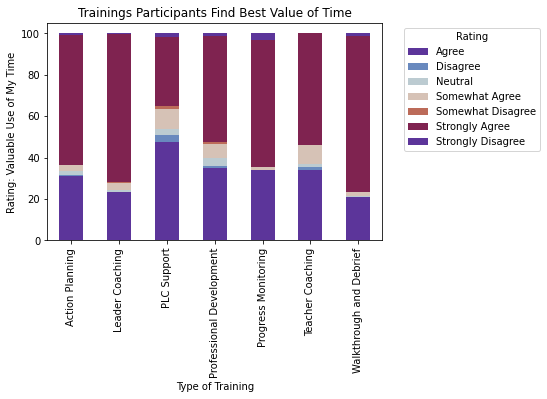

In [47]:
train_type_satisfaction_100_bar = train_type_satisfaction.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('twilight_shifted'))
plt.ylabel("Rating: Valuable Use of My Time")
plt.xlabel("Type of Training")
plt.title("Trainings Participants Find Best Value of Time")
plt.xticks(rotation= 90, horizontalalignment="center")
plt.legend(title="Rating",bbox_to_anchor=(1.05,1))

In [48]:
# Create crosstab of delivery method and learning to gauge popularity of different trainings
train_type_learn = pd.crosstab(df_2['Survey Type'], df_2['I learned something:'], dropna = False)

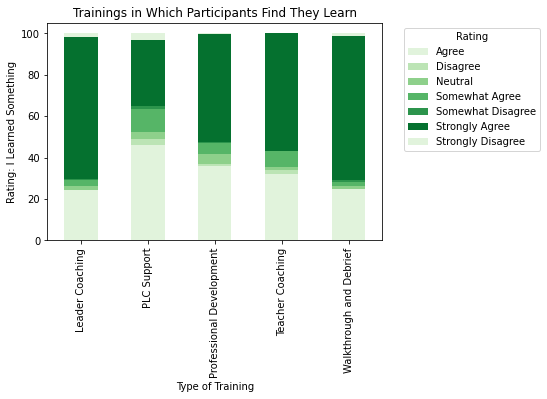

In [49]:
train_type_learn_100_bar = train_type_learn.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens'))
plt.ylabel("Rating: I Learned Something")
plt.xlabel("Type of Training")
plt.title("Trainings in Which Participants Find They Learn")
plt.xticks(rotation= 90, horizontalalignment="center")
plt.legend(title="Rating",bbox_to_anchor=(1.05,1))

#### Customer Satisfaction Rate

<AxesSubplot:xlabel='Likely to recommend Instruction Partners', ylabel='Count'>

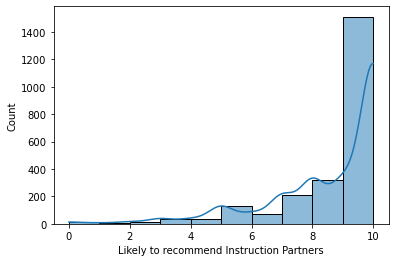

In [50]:
# Histogram to see distribution of satisfaction rate
sns.histplot(df_2['Likely to recommend Instruction Partners'], bins = 10, kde = True)

In [51]:
# Create new variable based on satisfaction rate
df_2.loc[df_2['Likely to recommend Instruction Partners'] > 7, 'Satisfaction Rate'] = 'High Satisfaction Rate'

/Users/caitlin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/caitlin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [52]:
df_2.loc[(df_2['Likely to recommend Instruction Partners'] <= 7) & (df_2['Likely to recommend Instruction Partners'] > 2), 'Satisfaction Rate'] = 'Middle Satisfaction Rate'

In [53]:
df_2.loc[df_2['Likely to recommend Instruction Partners'] <= 2, 'Satisfaction Rate'] = 'Low Satisfaction Rate'

In [54]:
# Check creation of satisfaction rate
df_2[['Satisfaction Rate','Likely to recommend Instruction Partners']].tail(9)

,Satisfaction Rate,Likely to recommend Instruction Partners
3637,Middle Satisfaction Rate,4.0
3640,High Satisfaction Rate,8.0
3641,High Satisfaction Rate,9.0
3643,Middle Satisfaction Rate,7.0
3644,NaN,NaN
3645,NaN,NaN
3646,NaN,NaN
3647,NaN,NaN
3648,NaN,NaN


In [55]:
df_2['Satisfaction Rate'].value_counts()

High Satisfaction Rate      1833
Middle Satisfaction Rate     485
Low Satisfaction Rate         35
Name: Satisfaction Rate, dtype: int64

Values add up, so the variable has been created.

In [56]:
df_2['Likely to recommend Instruction Partners'].value_counts(dropna = True)

10.0    1210
8.0      321
9.0      302
7.0      208
5.0      130
6.0       74
3.0       38
4.0       35
2.0       15
0.0       13
1.0        7
Name: Likely to recommend Instruction Partners, dtype: int64

In [57]:
# Create crosstab of region and day of week
client_satisfaction = pd.crosstab(df_2['Submitter Role'], df_2['Satisfaction Rate'], dropna = False)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Assistant Principal'),
  Text(1, 0, 'District Leader / CMO Leader'),
  Text(2, 0, 'Instructional Coach'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Principal'),
  Text(5, 0, 'Superintendent / CMO Executive Director'),
  Text(6, 0, 'Teacher'),
  Text(7, 0, 'Teacher Leader')])

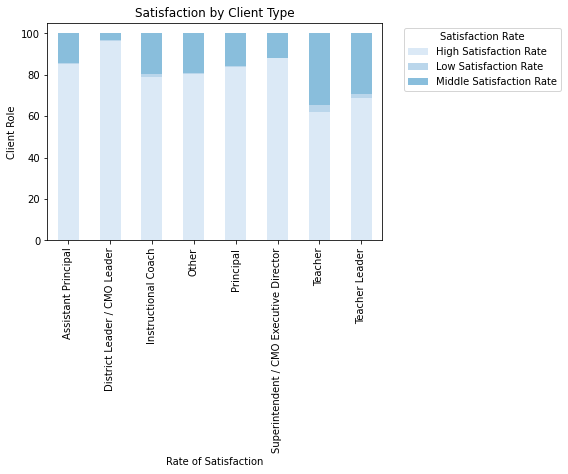

In [58]:
# Bar graph of region and day
client_satisfaction_100_bar = client_satisfaction.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues'))
plt.ylabel("Client Role")
plt.xlabel("Rate of Satisfaction")
plt.title("Satisfaction by Client Type")
plt.legend(title="Satisfaction Rate",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 90, horizontalalignment="center")

## 5. Data Profile
* Dates of survey data: July 13, 2021 to February 28, 2022
* Number of districts: 73
* Number of schools: 223
* Delivery Method: Onsite = 35%, Virtual = 65%
* Most common type of training: virtual professional development
* Least common type of training: onsite progress monitoring
* Trainee make up: Most common = Teachers at 21%, Least common = Superintendent at 1%
* Trainings with highest ratings on use of time and learned something: Walkthrough and Debrief
* Group with highest satisfaction rating: District Leaders

## 6. Download Dataframe

In [59]:
# Download DF
df_2.to_csv(os.path.join(path, 'Instruction Partners Survey Data - PREPARED.csv'))